In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments, RLIntro.AccessControl

In [2]:
using Plots

In [3]:
env = AccessControlEnv()
nstates = length(observation_space(env))
nactions = length(action_space(env))
agent = Agent(
    π=QBasedPolicy(
        learner=DifferentialTDLearner(
            approximator=TabularQApproximator(n_state=nstates, n_action=nactions),
            α=0.01,
            β=0.01,
        ),
        selector=EpsilonGreedySelector(0.1)
    ),
    buffer=episode_RTSA_buffer()
)

Agent{QBasedPolicy{DifferentialTDLearner{TabularQApproximator},EpsilonGreedySelector{:linear}},EpisodeTurnBuffer{(:reward, :terminal, :state, :action),Tuple{Float64,Bool,Int64,Int64},NamedTuple{(:reward, :terminal, :state, :action),Tuple{Array{Float64,1},Array{Bool,1},Array{Int64,1},Array{Int64,1}}}},Symbol}(QBasedPolicy{DifferentialTDLearner{TabularQApproximator},EpsilonGreedySelector{:linear}}(DifferentialTDLearner{TabularQApproximator}(TabularQApproximator([0.0 0.0; 0.0 0.0; … ; 0.0 0.0; 0.0 0.0]), 0.01, 0.01, 0.0, 0), EpsilonGreedySelector{:linear}(0.1, 1.0, 0, 0, 1)), NamedTuple{(:reward, :terminal, :state, :action),Tuple{Float64,Bool,Int64,Int64}}[], :DEFAULT)

In [4]:
run(agent, env, StopAfterStep(2*10^6; is_show_progress=false))

EmptyHook()

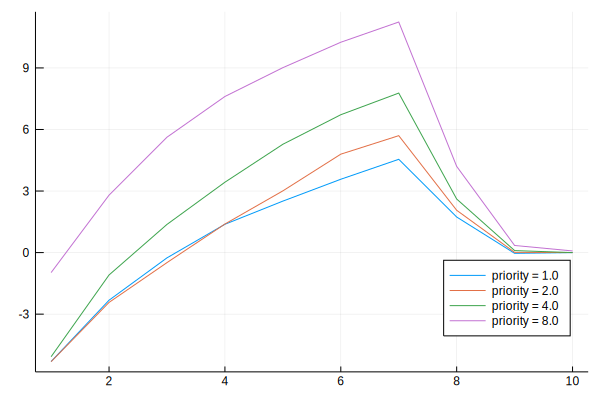

In [5]:
p = plot(legend=:bottomright)
for i in 1:length(AccessControl.PRIORITIES)
    plot!(
        [agent.π.learner.approximator(AccessControl.TRANSFORMER[(CartesianIndex(n+1, i))]) |> maximum
            for n in 1:AccessControl.N_SERVERS],
        label="priority = $(AccessControl.PRIORITIES[i])")
end
p